In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'
                       .format(postgres_user, postgres_pw, postgres_host,
                               postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM useducation', con=engine)

engine.dispose()

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
df_cpy = df.copy()
cols = list(df_cpy.columns)
cols = [x for x in cols if x not in ('PRIMARY_KEY', 'STATE', 'YEAR')]
unique_years = df_cpy['YEAR'].unique()

In [5]:
for col in df_cpy.columns:
    null_percent = df_cpy[col].isnull().sum()*100/len(df_cpy[col])
    print('{} has {} percent null values'.format(col, null_percent))

PRIMARY_KEY has 0.0 percent null values
STATE has 0.0 percent null values
YEAR has 0.0 percent null values
ENROLL has 17.62734584450402 percent null values
TOTAL_REVENUE has 14.20911528150134 percent null values
FEDERAL_REVENUE has 14.20911528150134 percent null values
STATE_REVENUE has 14.20911528150134 percent null values
LOCAL_REVENUE has 14.20911528150134 percent null values
TOTAL_EXPENDITURE has 14.20911528150134 percent null values
INSTRUCTION_EXPENDITURE has 14.20911528150134 percent null values
SUPPORT_SERVICES_EXPENDITURE has 14.20911528150134 percent null values
OTHER_EXPENDITURE has 17.62734584450402 percent null values
CAPITAL_OUTLAY_EXPENDITURE has 14.20911528150134 percent null values
GRADES_PK_G has 11.595174262734584 percent null values
GRADES_KG_G has 8.847184986595174 percent null values
GRADES_4_G has 8.780160857908847 percent null values
GRADES_8_G has 8.780160857908847 percent null values
GRADES_12_G has 8.780160857908847 percent null values
GRADES_1_8_G has 8.7801

In [6]:
#For those entries where we can replace missing values with yearly average we do so. 
for year in unique_years:
    for column in cols:
        df_cpy[column].loc[df_cpy['YEAR'] == year] = df_cpy[column].loc[df_cpy['YEAR'] == year].fillna(df_cpy[column].loc[df_cpy['YEAR'] == year].mean())


c:\python\python37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
for col in df_cpy.columns:
    null_percent = df_cpy[col].isnull().sum()*100/len(df_cpy[col])
    print('{} has {} percent null values'.format(col, null_percent))

PRIMARY_KEY has 0.0 percent null values
STATE has 0.0 percent null values
YEAR has 0.0 percent null values
ENROLL has 7.171581769436997 percent null values
TOTAL_REVENUE has 3.418230563002681 percent null values
FEDERAL_REVENUE has 3.418230563002681 percent null values
STATE_REVENUE has 3.418230563002681 percent null values
LOCAL_REVENUE has 3.418230563002681 percent null values
TOTAL_EXPENDITURE has 3.418230563002681 percent null values
INSTRUCTION_EXPENDITURE has 3.418230563002681 percent null values
SUPPORT_SERVICES_EXPENDITURE has 3.418230563002681 percent null values
OTHER_EXPENDITURE has 7.171581769436997 percent null values
CAPITAL_OUTLAY_EXPENDITURE has 3.418230563002681 percent null values
GRADES_PK_G has 6.836461126005362 percent null values
GRADES_KG_G has 6.836461126005362 percent null values
GRADES_4_G has 6.836461126005362 percent null values
GRADES_8_G has 6.836461126005362 percent null values
GRADES_12_G has 6.836461126005362 percent null values
GRADES_1_8_G has 6.83646

In [8]:
#For those entries where we cannot replace missing values with yearly average we instead use average of the column (on top of previous replacement.)  
for column in cols:
    df_cpy[column] = df_cpy[column].fillna(df_cpy[column].mean())


In [9]:
for col in df_cpy.columns:
    null_percent = df_cpy[col].isnull().sum()*100/len(df_cpy[col])
    print('{} has {} percent null values'.format(col, null_percent))

PRIMARY_KEY has 0.0 percent null values
STATE has 0.0 percent null values
YEAR has 0.0 percent null values
ENROLL has 0.0 percent null values
TOTAL_REVENUE has 0.0 percent null values
FEDERAL_REVENUE has 0.0 percent null values
STATE_REVENUE has 0.0 percent null values
LOCAL_REVENUE has 0.0 percent null values
TOTAL_EXPENDITURE has 0.0 percent null values
INSTRUCTION_EXPENDITURE has 0.0 percent null values
SUPPORT_SERVICES_EXPENDITURE has 0.0 percent null values
OTHER_EXPENDITURE has 0.0 percent null values
CAPITAL_OUTLAY_EXPENDITURE has 0.0 percent null values
GRADES_PK_G has 0.0 percent null values
GRADES_KG_G has 0.0 percent null values
GRADES_4_G has 0.0 percent null values
GRADES_8_G has 0.0 percent null values
GRADES_12_G has 0.0 percent null values
GRADES_1_8_G has 0.0 percent null values
GRADES_9_12_G has 0.0 percent null values
GRADES_ALL_G has 0.0 percent null values
AVG_MATH_4_SCORE has 0.0 percent null values
AVG_MATH_8_SCORE has 0.0 percent null values
AVG_READING_4_SCORE 

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [13]:
df_cpy.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.161654e+05,9.084108e+06,7.662749e+05,4.213597e+06,4.104236e+06,9.190557e+06,4.758243e+06,...,64590.152441,64331.744106,54418.075582,5.196200e+05,2.474932e+05,8.029178e+05,234.164118,277.962776,218.636919,263.539168
std,NaN,NaN,7.393983,9.668532e+05,1.091052e+07,1.066339e+06,5.146846e+06,5.092087e+06,1.112554e+07,5.844447e+06,...,76686.131855,75365.783877,64848.469374,6.147223e+05,2.938945e+05,9.126983e+05,6.581895,6.288270,4.717234,3.949458
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.164118,277.962776,218.636919,263.539168
50%,NaN,NaN,2004.000000,8.083635e+05,6.077218e+06,4.708280e+05,2.946394e+06,2.565186e+06,6.179938e+06,3.168123e+06,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.164118,277.962776,218.636919,263.539168
75%,NaN,NaN,2011.000000,9.486075e+05,1.109366e+07,8.697107e+05,5.050045e+06,4.827849e+06,1.086951e+07,5.632717e+06,...,71814.250000,72131.000000,64898.890909,5.749118e+05,2.825390e+05,8.830054e+05,234.184508,277.962776,218.636919,263.539168


Based on the descriptive statistics it is clear that there is a reasonably high standard deviation for all columns other than the last four. This is because these last columns had significant missing values that were replaced using an average. Thus we would expect a smaller deviation in these columns. 


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


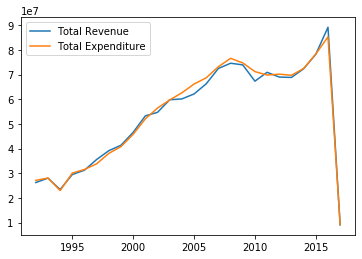

In [31]:
df_cali = df_cpy.loc[df_cpy['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()
plt.plot(df_cali['TOTAL_REVENUE'])
plt.plot(df_cali['TOTAL_EXPENDITURE'])
plt.legend(['Total Revenue', 'Total Expenditure'])
plt.show()

We can see that in most cases the lines line up pretty closes. There are a few periods where we have divergence. We have periods where expenditure exceeds revenue in 2003-2009 and the reverse in the late 90s and around 2015. We can see sharp dips around 1994 and again around 2009.

I was unable to find state-wise news theat clearly correlated to these changes.

The sharp fall after 2015 is most likely due to missing data. 

3. In your chosen state, which of the lessons are the students more successful, math or reading?


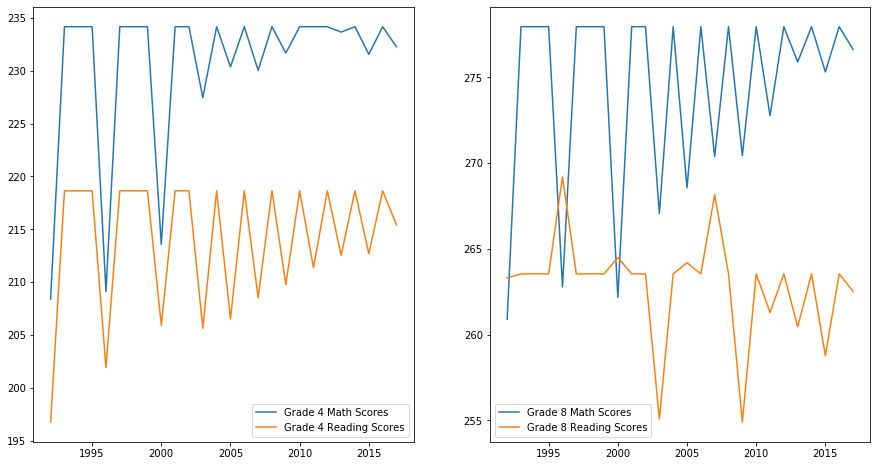

In [41]:
df_cali = df_cpy.loc[df_cpy['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(df_cali['AVG_MATH_4_SCORE'])
plt.plot(df_cali['AVG_READING_4_SCORE'])
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])

plt.subplot(1,2,2)
plt.plot(df_cali['AVG_MATH_8_SCORE'])
plt.plot(df_cali['AVG_READING_8_SCORE'])
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])


plt.show()

We can see that in grade 4 our students consistently score higher in math than in reading across all years. A similar trend is observed for grade 8 with a few minor exceptions around the years 1996 and 2000 where the reverse is true. 

4. What are the distributions of the math and reading scores in the sample?


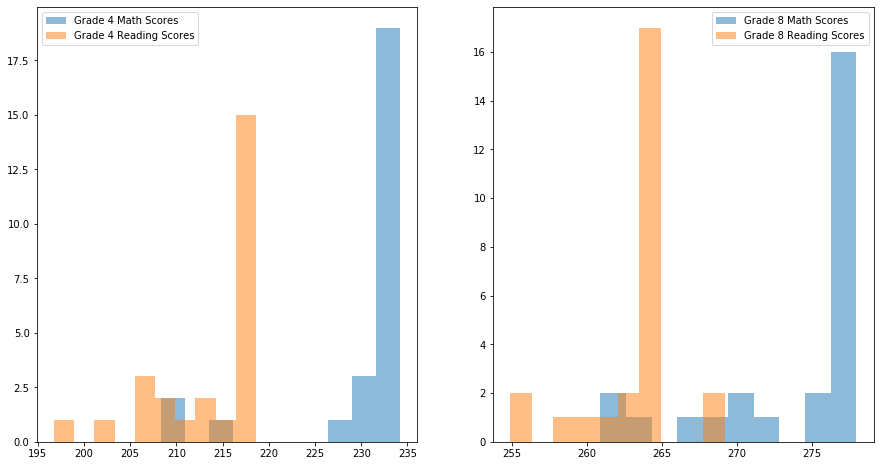

In [46]:
df_cali = df_cpy.loc[df_cpy['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.hist(df_cali['AVG_MATH_4_SCORE'], alpha=.5)
plt.hist(df_cali['AVG_READING_4_SCORE'], alpha=.5)
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])

plt.subplot(1,2,2)
plt.hist(df_cali['AVG_MATH_8_SCORE'], alpha=.5)
plt.hist(df_cali['AVG_READING_8_SCORE'], alpha=.5)
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])


plt.show()

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


In [48]:
df_cpy0 = pd.DataFrame()
df_cpy2 = pd.DataFrame()
df_cpy3 = pd.DataFrame()

df_cpy0 = df.copy()
df_cpy2 = df.copy()
df_cpy3 = df.copy()

for column in cols:
    df_cpy2[column] = df_cpy2[column].fillna(df_cpy2[column].median())
    df_cpy3[column] = df_cpy3[column].fillna(df_cpy3[column].interpolate(method='linear'))

In [49]:
df_cali0 = df_cpy0.loc[df_cpy0['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()
df_cali2 = df_cpy2.loc[df_cpy2['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()
df_cali3 = df_cpy3.loc[df_cpy3['STATE'] == 'CALIFORNIA'].groupby('YEAR').sum()

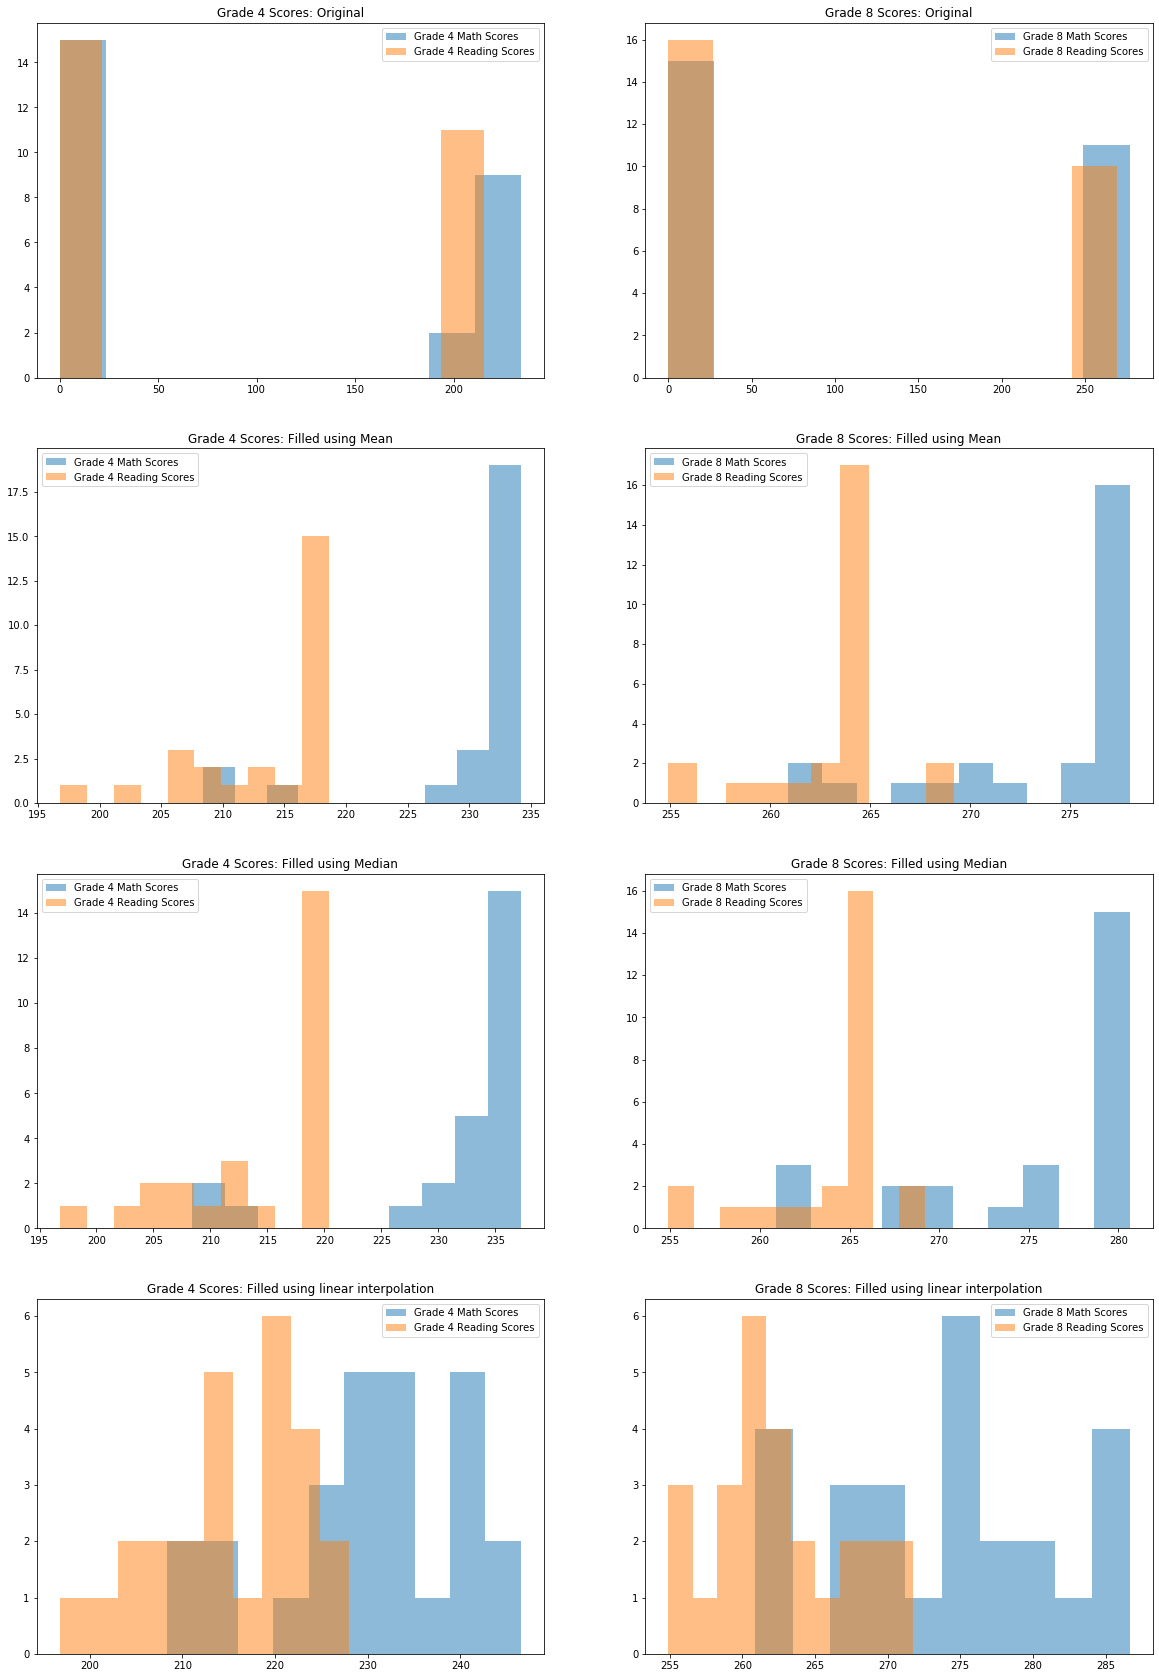

In [57]:
plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
plt.hist(df_cali0['AVG_MATH_4_SCORE'], alpha=.5)
plt.hist(df_cali0['AVG_READING_4_SCORE'], alpha=.5)
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])
plt.title('Grade 4 Scores: Original')

plt.subplot(4,2,2)
plt.hist(df_cali0['AVG_MATH_8_SCORE'], alpha=.5)
plt.hist(df_cali0['AVG_READING_8_SCORE'], alpha=.5)
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])
plt.title('Grade 8 Scores: Original')

plt.subplot(4,2,3)
plt.hist(df_cali['AVG_MATH_4_SCORE'], alpha=.5)
plt.hist(df_cali['AVG_READING_4_SCORE'], alpha=.5)
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])
plt.title('Grade 4 Scores: Filled using Mean')

plt.subplot(4,2,4)
plt.hist(df_cali['AVG_MATH_8_SCORE'], alpha=.5)
plt.hist(df_cali['AVG_READING_8_SCORE'], alpha=.5)
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])
plt.title('Grade 8 Scores: Filled using Mean')

plt.subplot(4,2,5)
plt.hist(df_cali2['AVG_MATH_4_SCORE'], alpha=.5)
plt.hist(df_cali2['AVG_READING_4_SCORE'], alpha=.5)
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])
plt.title('Grade 4 Scores: Filled using Median')

plt.subplot(4,2,6)
plt.hist(df_cali2['AVG_MATH_8_SCORE'], alpha=.5)
plt.hist(df_cali2['AVG_READING_8_SCORE'], alpha=.5)
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])
plt.title('Grade 8 Scores: Filled using Median')

plt.subplot(4,2,7)
plt.hist(df_cali3['AVG_MATH_4_SCORE'], alpha=.5)
plt.hist(df_cali3['AVG_READING_4_SCORE'], alpha=.5)
plt.legend(['Grade 4 Math Scores', 'Grade 4 Reading Scores'])
plt.title('Grade 4 Scores: Filled using linear interpolation')

plt.subplot(4,2,8)
plt.hist(df_cali3['AVG_MATH_8_SCORE'], alpha=.5)
plt.hist(df_cali3['AVG_READING_8_SCORE'], alpha=.5)
plt.legend(['Grade 8 Math Scores', 'Grade 8 Reading Scores'])
plt.title('Grade 8 Scores: Filled using linear interpolation')

plt.show()

It is clear that the linear interpolation method provides the most normal distribution for the missing data which would make it the most useful from a statistics perspective. The original (non filled) data is very uninformative. Both of the remaining methods (mean and median) provide pretty similar results but in this case the median approach seems better. 